In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

#change filename here if necessary
filename = 'Desktop\AAPL (3).csv'

df = pd.read_csv(filename)

df.sort_values('Date')

df.tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume
4517,2018-08-31,226.509995,228.869995,226.000000,227.630005,227.630005,43340100
4518,2018-09-04,228.410004,229.179993,226.630005,228.360001,228.360001,27390100
4519,2018-09-05,228.990005,229.669998,225.100006,226.869995,226.869995,33333000
4520,2018-09-06,226.229996,227.350006,221.300003,223.100006,223.100006,34290000
4521,2018-09-07,221.850006,225.369995,220.710007,221.300003,221.300003,37619800
4522,2018-09-10,220.949997,221.850006,216.470001,218.330002,218.330002,39516500
4523,2018-09-11,218.009995,224.300003,216.559998,223.850006,223.850006,35749000
4524,2018-09-12,224.940002,225.000000,219.839996,221.070007,221.070007,49278700
4525,2018-09-13,223.520004,228.350006,222.570007,226.410004,226.410004,41706400
4526,2018-09-14,225.750000,226.839996,222.520004,223.839996,223.839996,31902700


In [2]:
high_prices = df.loc[:,'High'].as_matrix()
low_prices = df.loc[:,'Low'].as_matrix()
mid_prices = (high_prices+low_prices)/2.0

print(mid_prices)

[  4.136161    4.2522325   4.2857145 ... 222.419998  225.4600065
 224.68     ]


C:\Users\Yi Rong\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\Yi Rong\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [3]:
scaler = MinMaxScaler()
mid_prices2 = mid_prices.reshape(-1,1)
mid_prices2 = scaler.fit_transform(mid_prices2)
train_data = mid_prices2[:4400]
test_data = mid_prices2[4400:]

# Reshape both train and test data
train_data = train_data.reshape(-1)
test_data = test_data.reshape(-1)

EMA = 0.0
gamma = 0.1
for ti in range(4400):
  EMA = gamma*train_data[ti] + (1-gamma)*EMA
  train_data[ti] = EMA

# Used for visualization and test purposes
all_mid_data = np.concatenate([train_data,test_data],axis=0)

In [4]:
window_size = 100
N = train_data.size
for pred_idx in range(window_size,N):
    
    if pred_idx >= N:
        date = dt.datetime.strptime(k, '%Y-%m-%d').date() + dt.timedelta(days=1)
    else:
        date = df.loc[pred_idx,'Date']

In [5]:
run_avg_predictions = []
run_avg_x = []

mse_errors = []

running_mean = 0.0
run_avg_predictions.append(running_mean)

decay = 0.1

for pred_idx in range(1,N):
    
    running_mean = running_mean*decay + (1.0-decay)*train_data[pred_idx-1]
    run_avg_predictions.append(running_mean)
    mse_errors.append((run_avg_predictions[-1]-train_data[pred_idx])**2)
    run_avg_x.append(date)

print('MSE error for EMA averaging: %.5f'%(0.5*np.mean(mse_errors)))

MSE error for EMA averaging: 0.00000


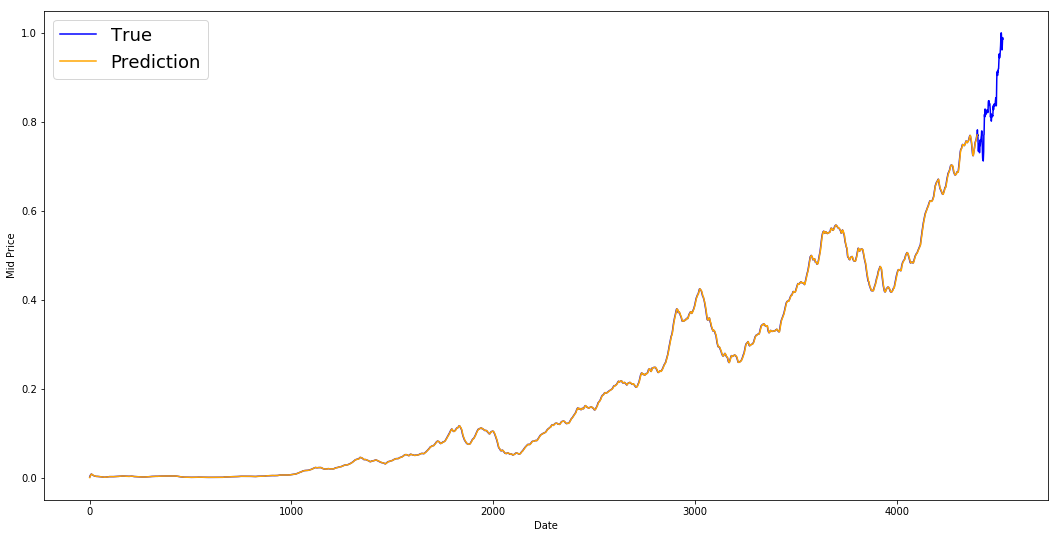

0.770428875767675


In [6]:
plt.figure(figsize = (18,9))
plt.plot(range(df.shape[0]),all_mid_data,color='b',label='True')
plt.plot(range(0,N),run_avg_predictions,color='orange', label='Prediction')
#plt.xticks(range(0,df.shape[0],50),df['Date'].loc[::50],rotation=45)
plt.xlabel('Date')
plt.ylabel('Mid Price')
plt.legend(fontsize=18)
plt.show()

print(run_avg_predictions[-1])

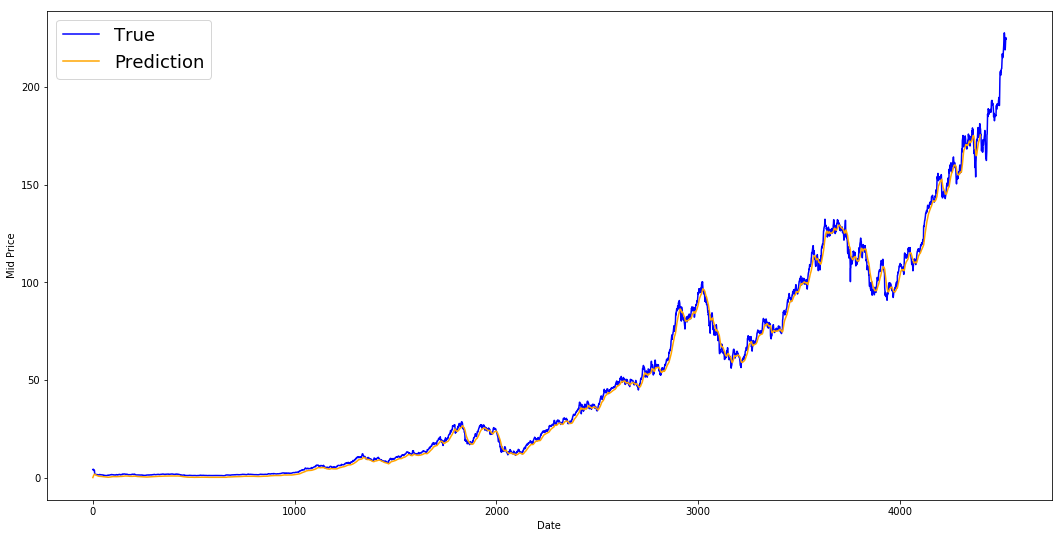

In [7]:
#Denormalize

highest = max(mid_prices)
denorm_predictions = [x * highest for x in run_avg_predictions]

plt.figure(figsize = (18,9))
plt.plot(range(df.shape[0]),mid_prices,color='b',label='True')
plt.plot(range(0,N),denorm_predictions,color='orange', label='Prediction')
#plt.xticks(range(0,df.shape[0],50),df['Date'].loc[::50],rotation=45)
plt.xlabel('Date')
plt.ylabel('Mid Price')
plt.legend(fontsize=18)
plt.show()

In [29]:
day4399_value_predicted = run_avg_predictions[-1]
day4400_value_actual = mid_prices[4400]

day4400_value_predicted = (day4399_value_predicted*decay + (1.0-decay)*train_data[4399])*highest

print(day4400_value_predicted)
print(day4400_value_actual)

175.7731472310713
178.369995


In [24]:
#EMA fails for more than 1 step ahead
last_val = run_avg_predictions[-1]
next_val = last_val*decay + (1.0-decay)*train_data[N-1]

test_predictions = []

test_predictions.append(next_val)

decay = 0.5

for pred_idx in range(N+1,len(mid_prices)):
    
    next_val = next_val*decay + (1.0-decay)*test_predictions[pred_idx-N-1]
    test_predictions.append(next_val)


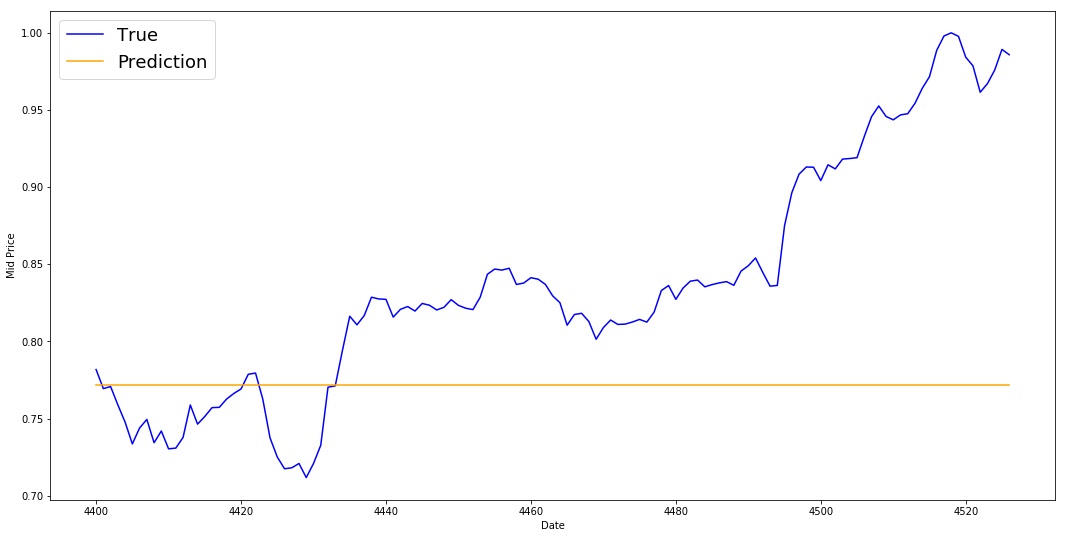

In [25]:
plt.figure(figsize = (18,9))
plt.plot(range(N, df.shape[0]),test_data,color='b',label='True')
plt.plot(range(N, df.shape[0]),test_predictions,color='orange', label='Prediction')
#plt.xticks(range(0,df.shape[0],50),df['Date'].loc[::50],rotation=45)
plt.xlabel('Date')
plt.ylabel('Mid Price')
plt.legend(fontsize=18)
plt.show()
